Mean MSE: Leave one out 0.9996, 10 folds 0.9946, 5 folds 0.9911, Test MSE: 1.0373
Mean MSE: Leave one out 0.9918, 10 folds 0.9888, 5 folds 0.9810, Test MSE: 1.0301
Mean MSE: Leave one out 0.9940, 10 folds 0.9901, 5 folds 0.9823, Test MSE: 1.0326
Mean MSE: Leave one out 0.9744, 10 folds 0.9763, 5 folds 0.9768, Test MSE: 1.0242
Mean MSE: Leave one out 0.9804, 10 folds 0.9811, 5 folds 0.9773, Test MSE: 1.0275


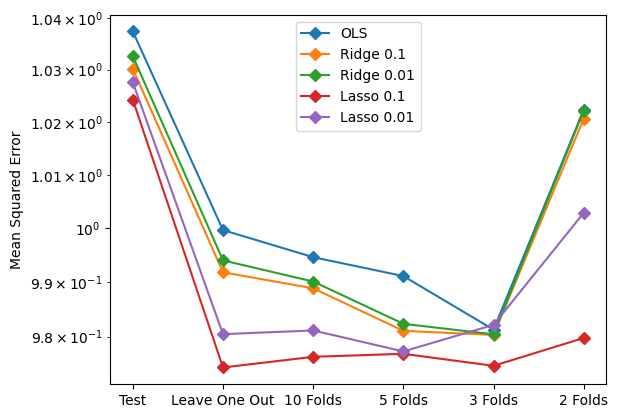

In [35]:
from numpy import empty, mean
from numpy.random import seed, uniform, normal
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample
import matplotlib.pyplot as plt

seed(0)

def Runge(x):
    return 1 / (1 + 25 * x**2)

VARIANCE = 1
N_POINTS = 500

x = uniform(-3, 3, N_POINTS)
y = Runge(x) + normal(0, VARIANCE, N_POINTS)
pol = PolynomialFeatures(degree=10)
test_data = uniform(-3, 3, N_POINTS)
y_true = Runge(test_data) + normal(0, VARIANCE, N_POINTS)


def cross_validation(k_folds, optimization_method):
    mean_mse = 0.
    for k in range(k_folds):
        train_idx = [i for i in range(N_POINTS) if i%k_folds!=k]
        test_idx = [i for i in range(N_POINTS) if i%k_folds==k]
        
        x_train = x[train_idx]
        y_train = y[train_idx]

        x_test = x[test_idx]
        y_test = y[test_idx]

        X = pol.fit_transform(x_train.reshape(-1, 1))

        scalar = StandardScaler()
        X = scalar.fit_transform(X)
        y_mean = y_train.mean()
        y_train -= y_mean
        y_train -= y_mean

        reg = optimization_method.fit(X, y_train)

        y_pred = reg.predict(scalar.transform(pol.transform(x_test.reshape(-1, 1))))

        mse = mean_squared_error(y_test, y_pred)

        mean_mse += mse / k_folds

    return mean_mse


for optimization_method, name in [
        (LinearRegression(), "OLS"),
        (Ridge(alpha=0.1), "Ridge 0.1"),
        (Ridge(alpha=0.01), "Ridge 0.01"),
        (Lasso(alpha=0.1), "Lasso 0.1"),
        (Lasso(alpha=0.01), "Lasso 0.01")
    ]:

    mean_mse_LEAVE_ONE_OUT = cross_validation(N_POINTS, optimization_method)
    mean_mse_10_FOLDS = cross_validation(10, optimization_method)
    mean_mse_5_FOLDS = cross_validation(5, optimization_method)
    mean_mse_3_FOLDS = cross_validation(3, optimization_method)
    mean_mse_2_FOLDS = cross_validation(2, optimization_method)

    scalar = StandardScaler()
    X = pol.fit_transform(x.reshape(-1, 1))
    X = scalar.fit_transform(X)
    y_center = y - y.mean()

    reg = optimization_method.fit(X, y_center)
    y_pred = reg.predict(scalar.transform(pol.transform(x.reshape(-1, 1)))) + y.mean()

    print(f"Mean MSE: Leave one out {mean_mse_LEAVE_ONE_OUT:.4f}, 10 folds {mean_mse_10_FOLDS:.4f}, 5 folds {mean_mse_5_FOLDS:.4f}, Test MSE: {mean_squared_error(y_true, y_pred):.4f}")
    plt.plot(range(6), [mean_squared_error(y_true, y_pred), mean_mse_LEAVE_ONE_OUT, mean_mse_10_FOLDS, mean_mse_5_FOLDS, mean_mse_3_FOLDS, mean_mse_2_FOLDS], 'D-', label=name)

plt.xticks(range(6), ['Test', 'Leave One Out', '10 Folds', '5 Folds', '3 Folds', '2 Folds'])
plt.ylabel('Mean Squared Error')
plt.legend()
plt.yscale('log')
plt.show()

We used n=50 datapoints uniformly distributed on the interval (-3, 3) to test how well cross validation predicts the accuracy of our model for OLS, Ridge and Lasso both with lambda = 0.1, 0.01. For the number of k-folds we used k = 5, 10, n and compared the prediction to another 50 points, uniformly distributed on (-3, 3). The results show that for k = 2, 3 we get estimated MSE that are not in the same magnitude as the MSE of the test data. For k = 5, 10, n we get MSE roughly like the MSE of the test data. This resembles what would be expected, as the portion of left out data of the training sinks significantly as we increase k. This trend shows for all tested optimization algorithms but was especially strong for OLS and Ridge. The exact results are in Table XXX.

**Compare cross-validation to bootstrap**

2 Bootstraps 1.0375   3 Bootstraps 1.0436   5 Bootstraps 1.0445   10 Bootstraps 1.0366   500 Bootstraps 1.0399   1000 Bootstraps 1.0392   
2 Bootstraps 1.0505   3 Bootstraps 1.0387   5 Bootstraps 1.0400   10 Bootstraps 1.0369   500 Bootstraps 1.0387   1000 Bootstraps 1.0396   
2 Bootstraps 1.0446   3 Bootstraps 1.0790   5 Bootstraps 1.0438   10 Bootstraps 1.0455   500 Bootstraps 1.0406   1000 Bootstraps 1.0399   
2 Bootstraps 1.0208   3 Bootstraps 1.0390   5 Bootstraps 1.0398   10 Bootstraps 1.0459   

c:\Users\larsb\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.971e+01, tolerance: 4.934e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\larsb\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.967e+00, tolerance: 4.790e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\larsb\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

500 Bootstraps 1.0376   

c:\Users\larsb\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.425e-02, tolerance: 4.977e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\larsb\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.710e+02, tolerance: 4.905e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\larsb\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

1000 Bootstraps 1.0378   
2 Bootstraps 1.0378   3 Bootstraps 1.0342   5 Bootstraps 1.0387   10 Bootstraps 1.0341   

c:\Users\larsb\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.344e+02, tolerance: 4.955e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\larsb\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.104e+02, tolerance: 4.820e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\larsb\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

500 Bootstraps 1.0354   

c:\Users\larsb\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.546e+02, tolerance: 4.664e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\larsb\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.389e+02, tolerance: 4.948e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\larsb\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

1000 Bootstraps 1.0363   


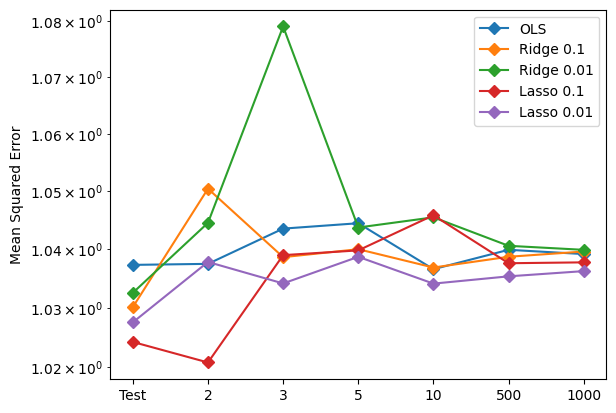

In [36]:
n_bootstraps = [2, 3, 5, 10, N_POINTS, 1_000]

y_true = y_true.reshape(-1, 1)
def bootstrap(optimization_method, name):

    error = []

    for i, n in enumerate(n_bootstraps):
        y_pred = empty((test_data.shape[0], n))
        for j in range(n):
            x_, y_ = resample(x, y)

            X = pol.fit_transform(x_.reshape(-1, 1))

            # print(i, n, j)
            y_pred[:, j] = optimization_method.fit(X, y_).predict(pol.transform(test_data.reshape(-1, 1))).ravel()

        error.append(mean( mean((y_true - y_pred)**2, axis=1, keepdims=True) ))

        print(f"{n} Bootstraps {error[i]:.4f}", end="   ")
    
    print()
    scalar = StandardScaler()
    X = pol.fit_transform(x.reshape(-1, 1))
    X = scalar.fit_transform(X)
    y_center = y - y.mean()

    reg = optimization_method.fit(X, y_center)
    y_pred = reg.predict(scalar.transform(pol.transform(x.reshape(-1, 1)))) + y.mean()

    plt.plot(range(len(n_bootstraps)+1), [mean_squared_error(y_true, y_pred)] + error, 'D-', label=name)

for optimization_method, name in [
        (LinearRegression(), "OLS"),
        (Ridge(alpha=0.1), "Ridge 0.1"),
        (Ridge(alpha=0.01), "Ridge 0.01"),
        (Lasso(alpha=0.1), "Lasso 0.1"),
        (Lasso(alpha=0.01), "Lasso 0.01")
    ]:
    bootstrap(optimization_method, name)

plt.xticks(range(len(n_bootstraps)+1), ['Test'] + n_bootstraps)
plt.ylabel('Mean Squared Error')
plt.legend()
plt.yscale('log')
plt.show()